<a href="https://colab.research.google.com/github/Gayathrijyothirmai2310/Air-Quality-Index-Prediction-Model/blob/main/Air_quality_Index_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df=pd.read_csv('air_quality.csv')

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df.duplicated().sum()

0

In [ ]:
df1=df.dropna(subset=['AQI'],inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [ ]:
df.shape

(24850, 16)

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


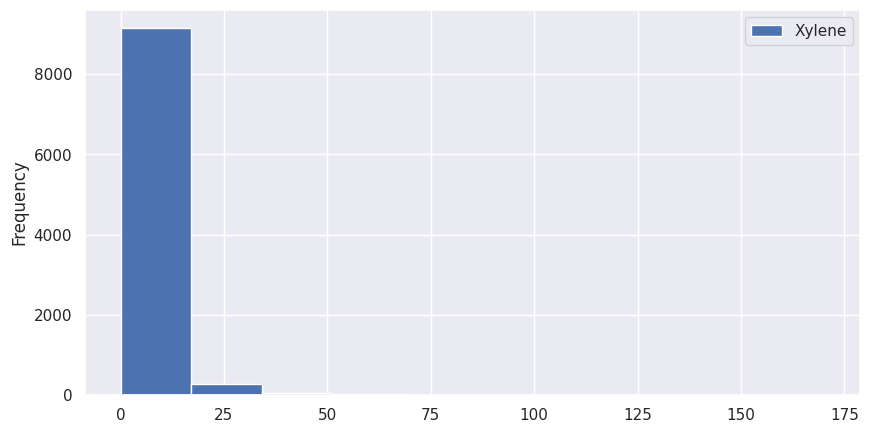

In [ ]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

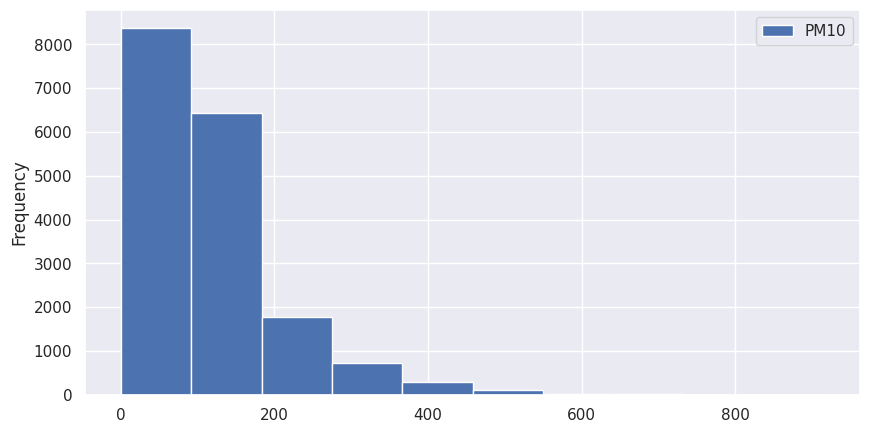

In [ ]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

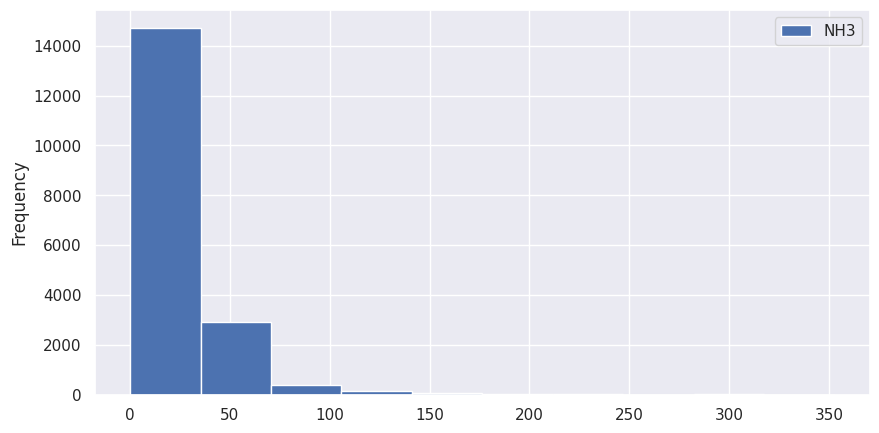

In [ ]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

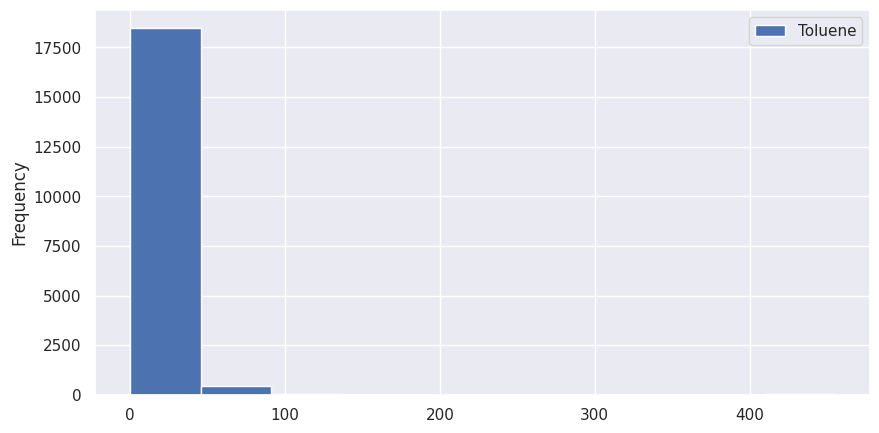

In [ ]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

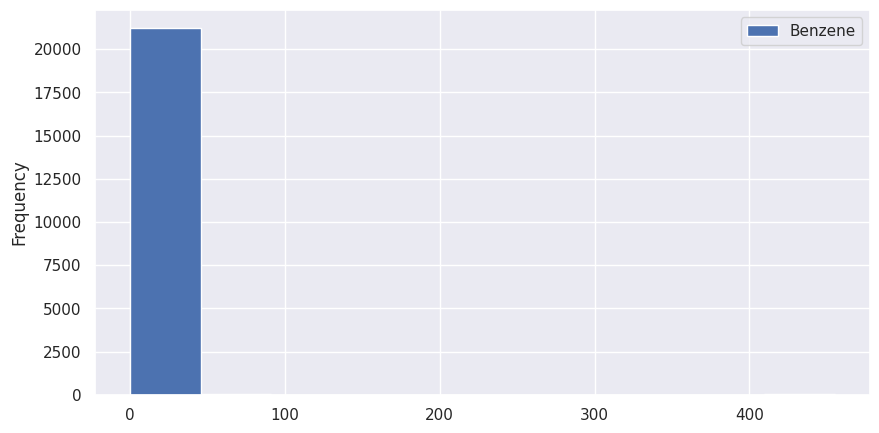

In [ ]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

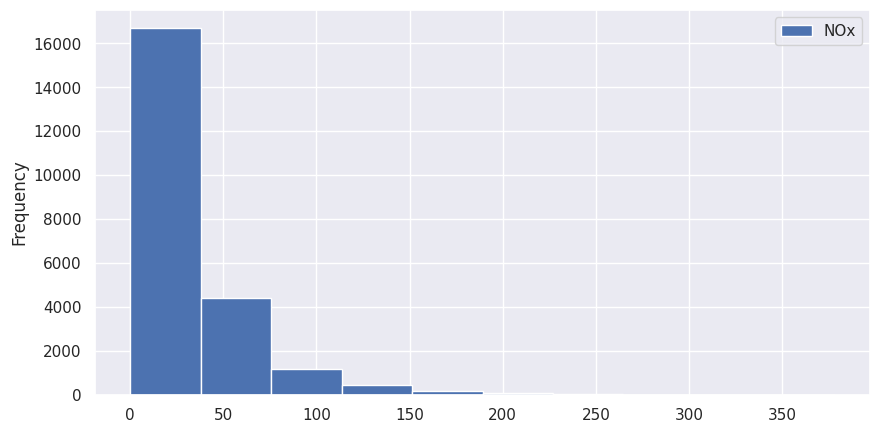

In [ ]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

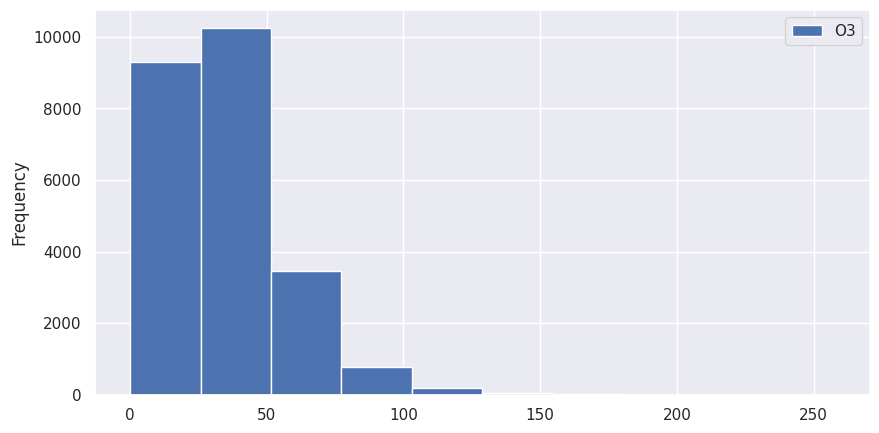

In [ ]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

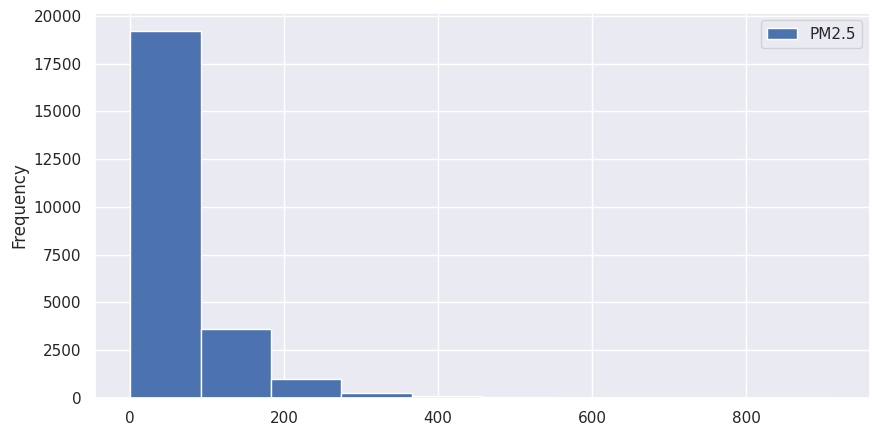

In [ ]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

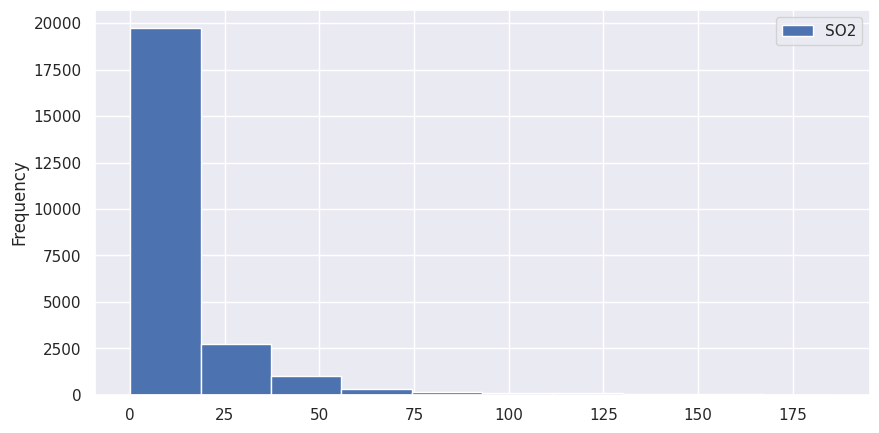

In [ ]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

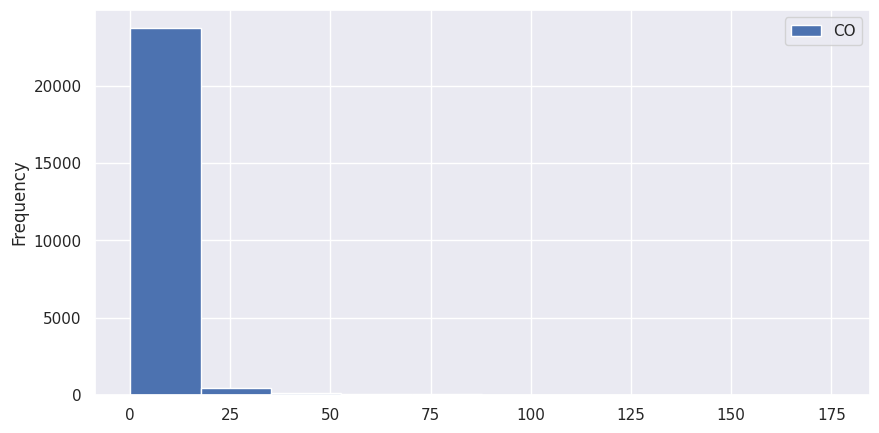

In [ ]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

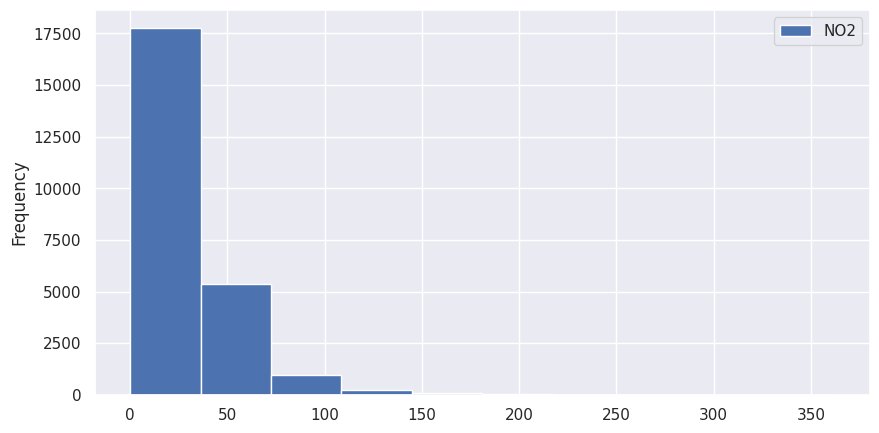

In [ ]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

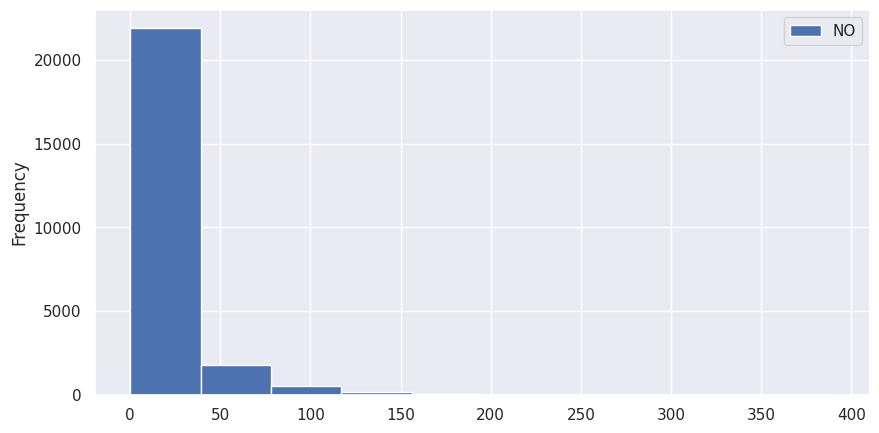

In [ ]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

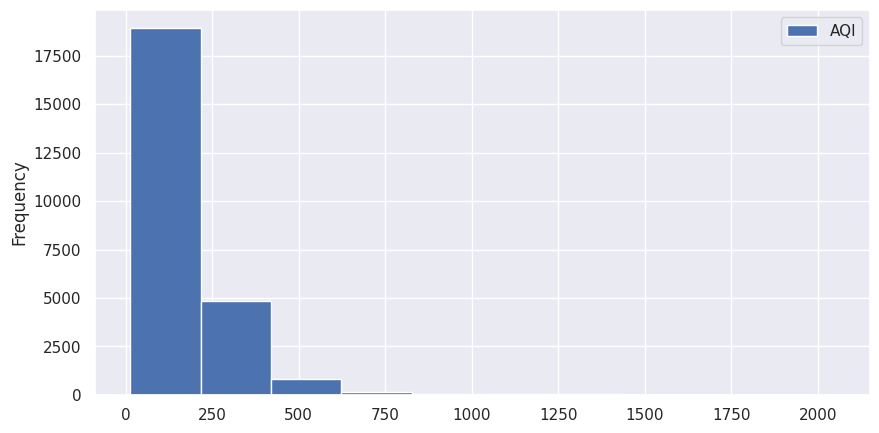

In [ ]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

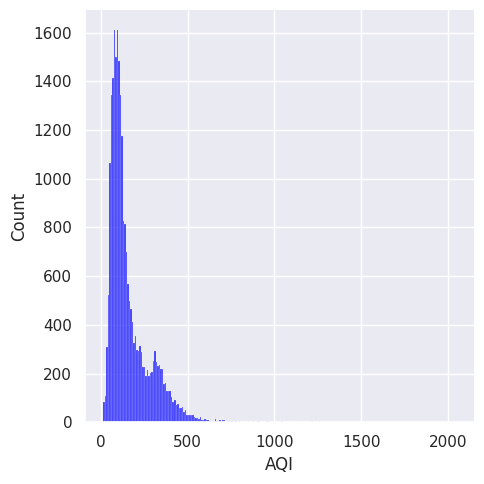

In [ ]:
sns.displot(df['AQI'],color='blue')
plt.show()

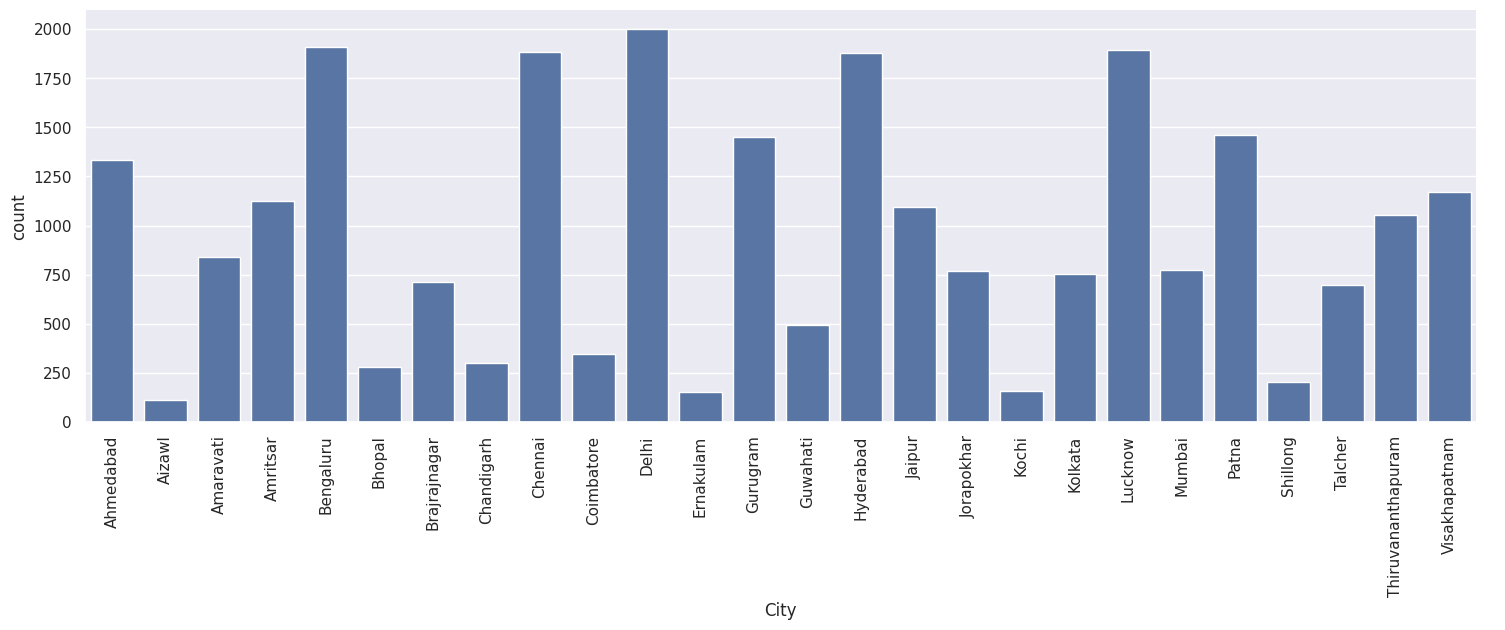

In [ ]:
import seaborn as sns

# Set the style for the plot
sns.set(style="darkgrid")

# Create a count plot
graph = sns.catplot(x='City', kind="count", data=df, height=5, aspect=3)

# Rotate the x-axis labels for better readability
graph.set_xticklabels(rotation=90)


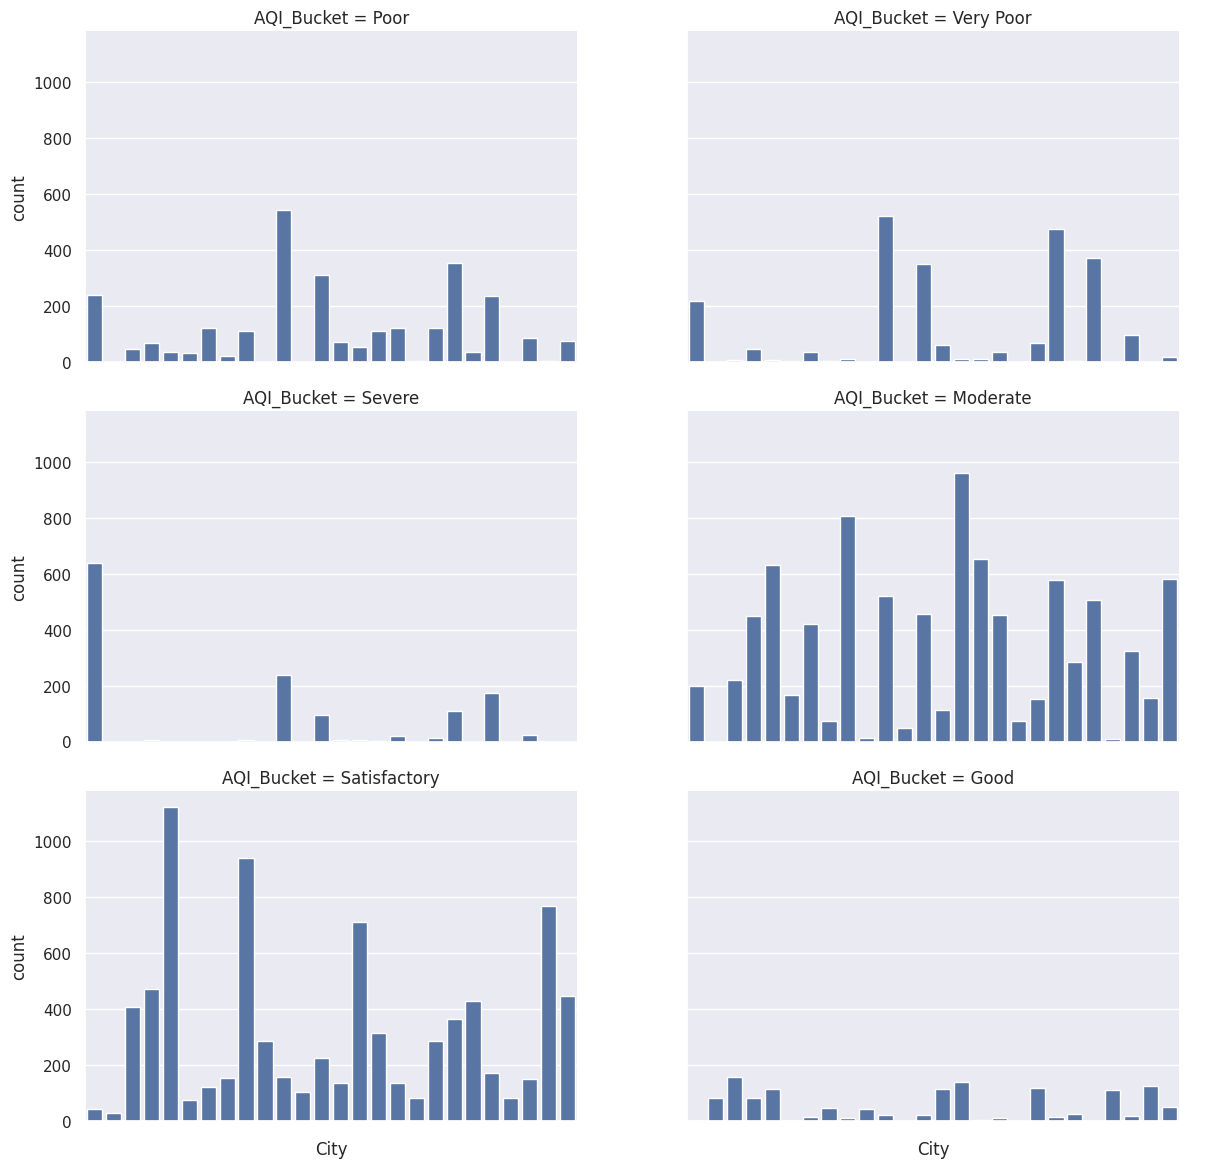

In [ ]:
sns.set(style="darkgrid")

graph = sns.catplot(x='City', kind="count", data=df,col="AQI_Bucket", col_wrap=2, height=4, aspect=1.5)

graph.set_xticklabels(rotation=90)


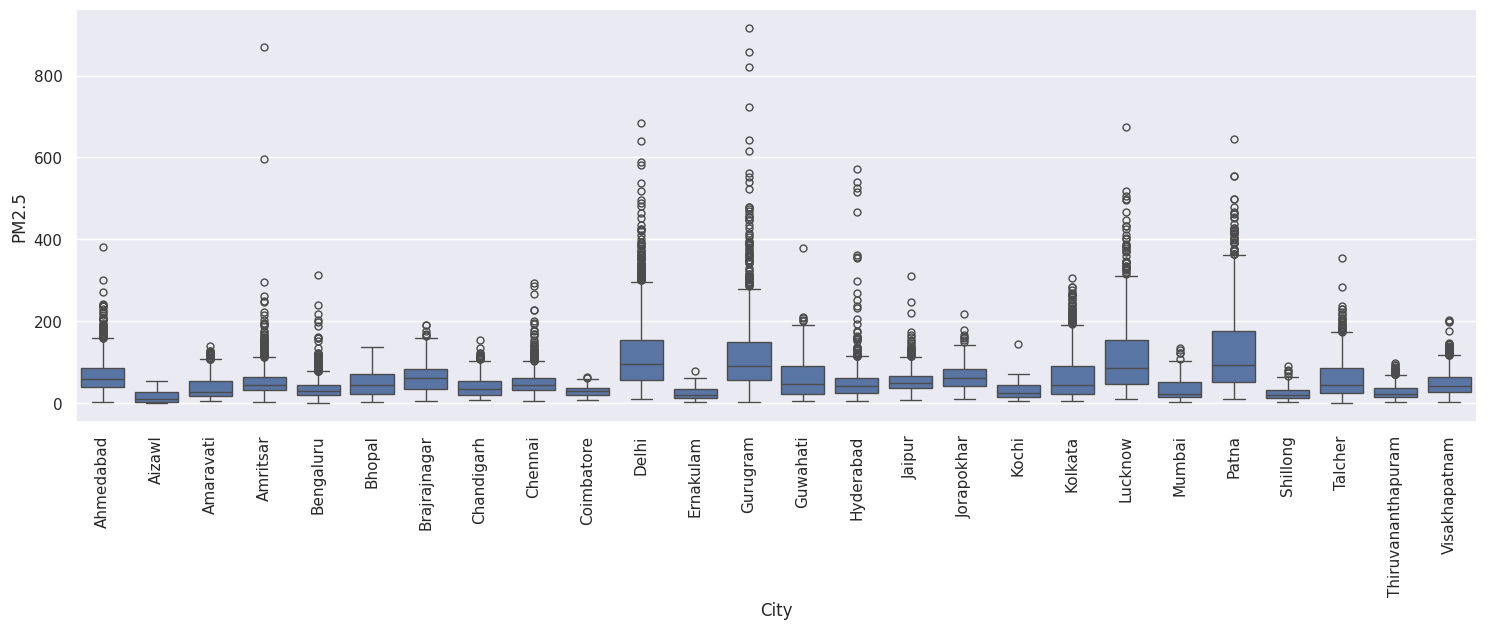

In [ ]:
graph1=sns.catplot(x='City',y="PM2.5",kind="box",data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

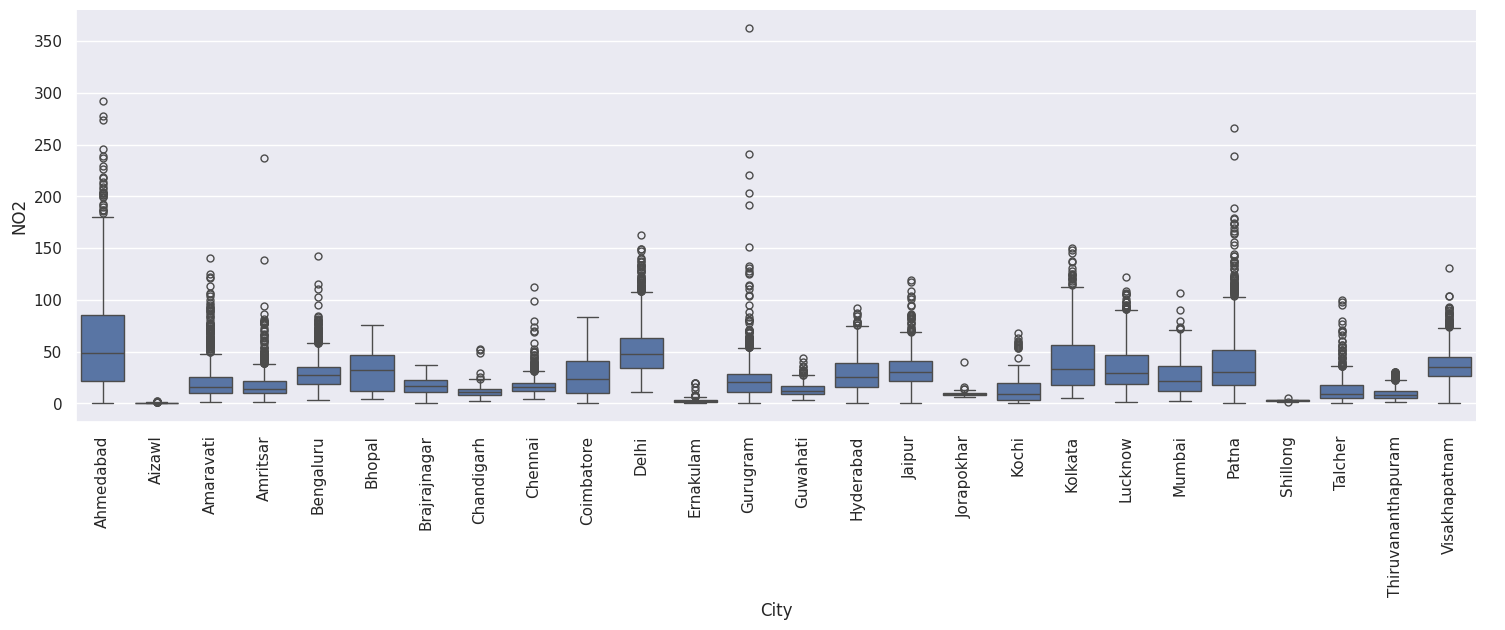

In [ ]:
graph2=sns.catplot(x='City',y="NO2",kind="box",data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

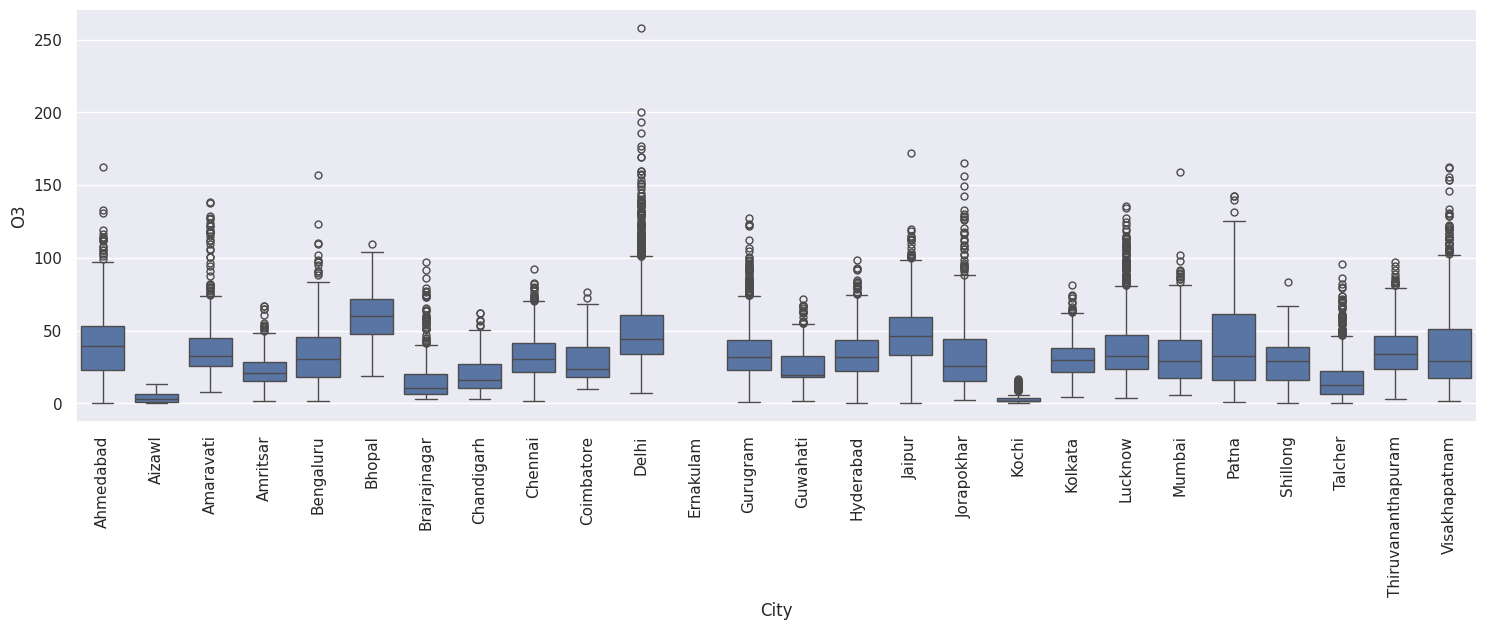

In [ ]:
graph3=sns.catplot(x='City',y="O3",kind="box",data=df,height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

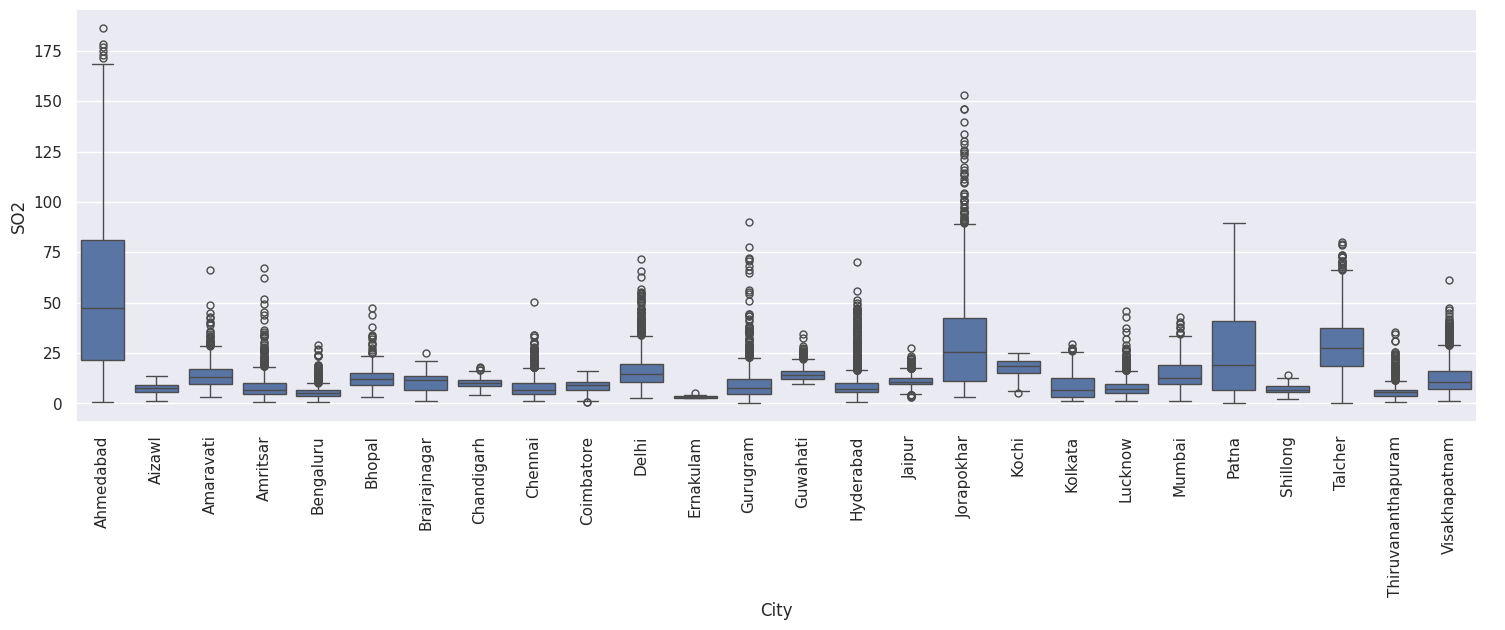

In [ ]:
graph4=sns.catplot(x='City',y="SO2",kind="box",data=df,height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

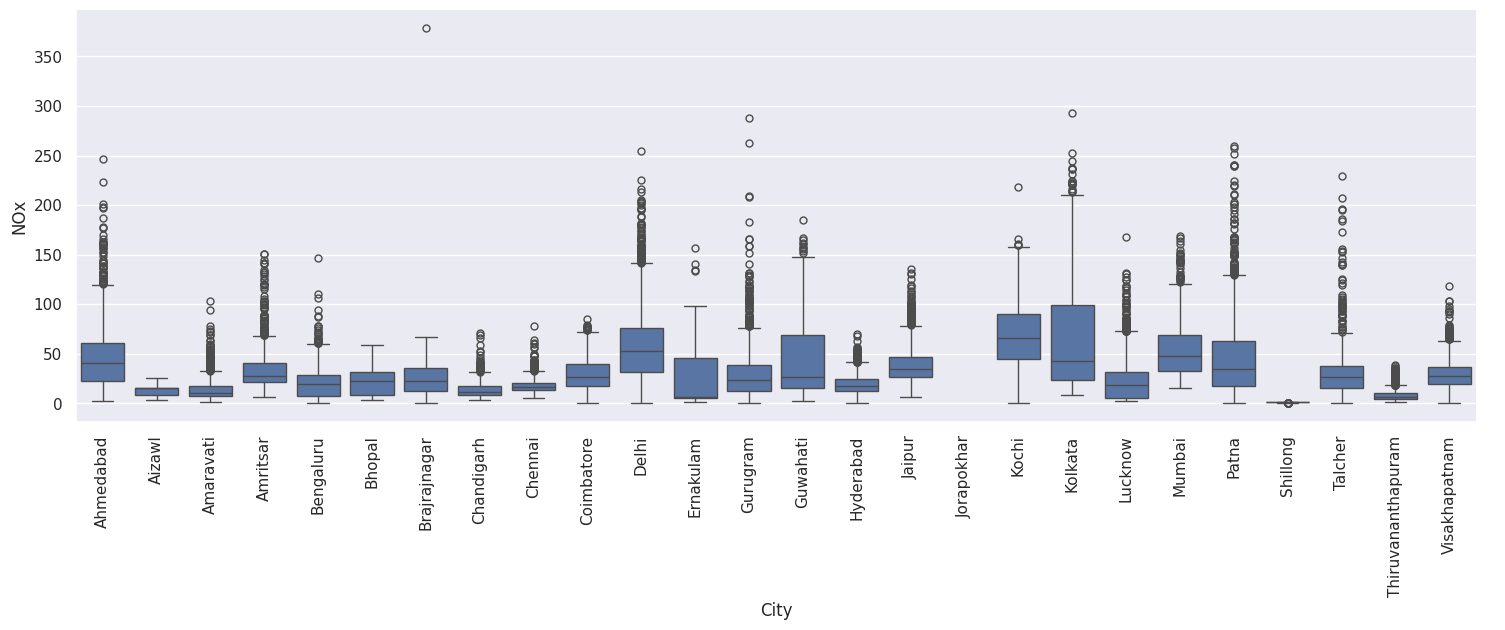

In [ ]:
graph5=sns.catplot(x='City',y="NOx",kind="box",data=df,height=5,aspect=3)
graph5.set_xticklabels(rotation=90)

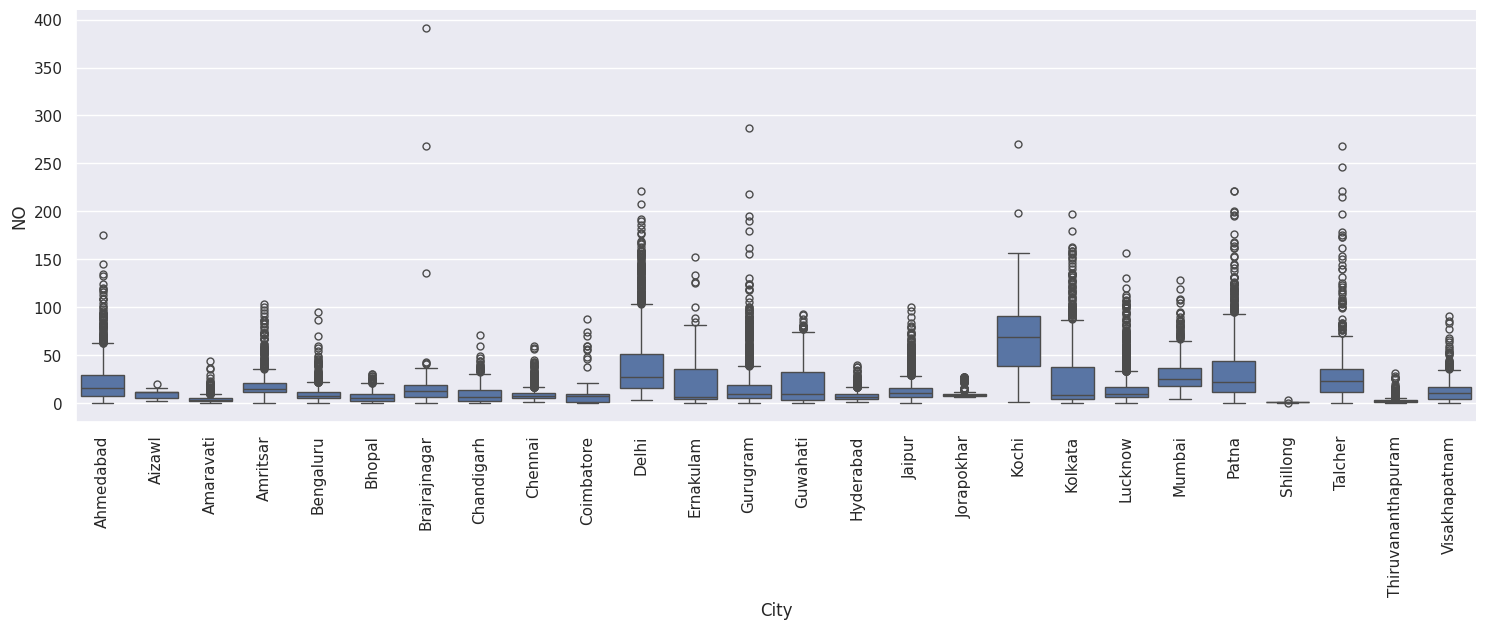

In [ ]:
graph6=sns.catplot(x='City',y="NO",kind="box",data=df,height=5,aspect=3)
graph6.set_xticklabels(rotation=90)

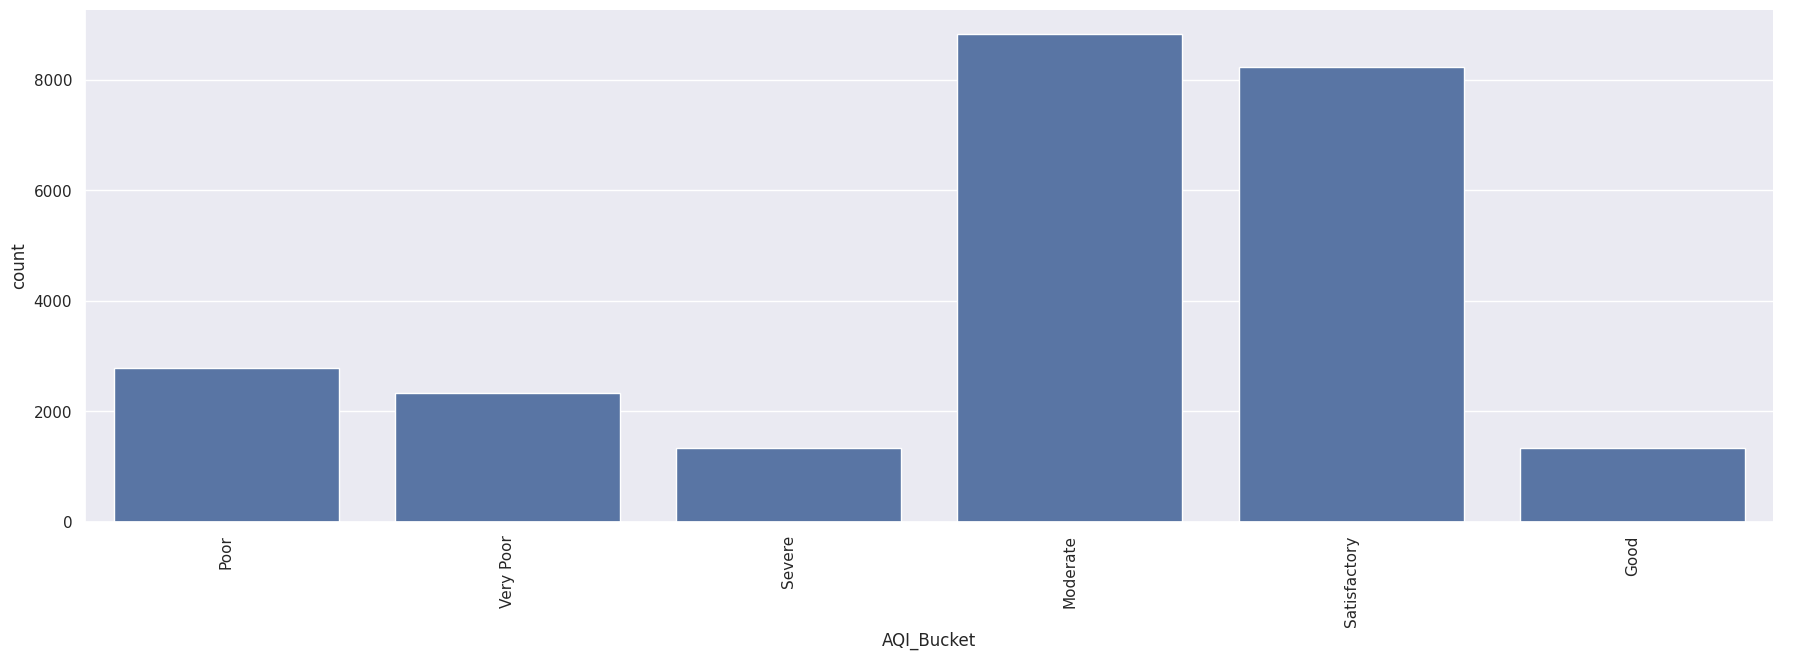

In [ ]:
graph7=sns.catplot(x='AQI_Bucket',kind="count",data=df,height=6,aspect=3)
graph7.set_xticklabels(rotation=90)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [ ]:
df.describe().loc["mean"]

,mean
PM2.5,67.476613
PM10,118.454435
NO,17.622421
NO2,28.978391
NOx,32.289012
NH3,23.848366
CO,2.345267
SO2,14.362933
O3,34.912885
Benzene,3.458668


In [ ]:
df=df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Toluene":{np.nan:9.525714},
    "Xylene":{np.nan:3.588683},
    "AQI":{np.nan:166.463581},

})

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


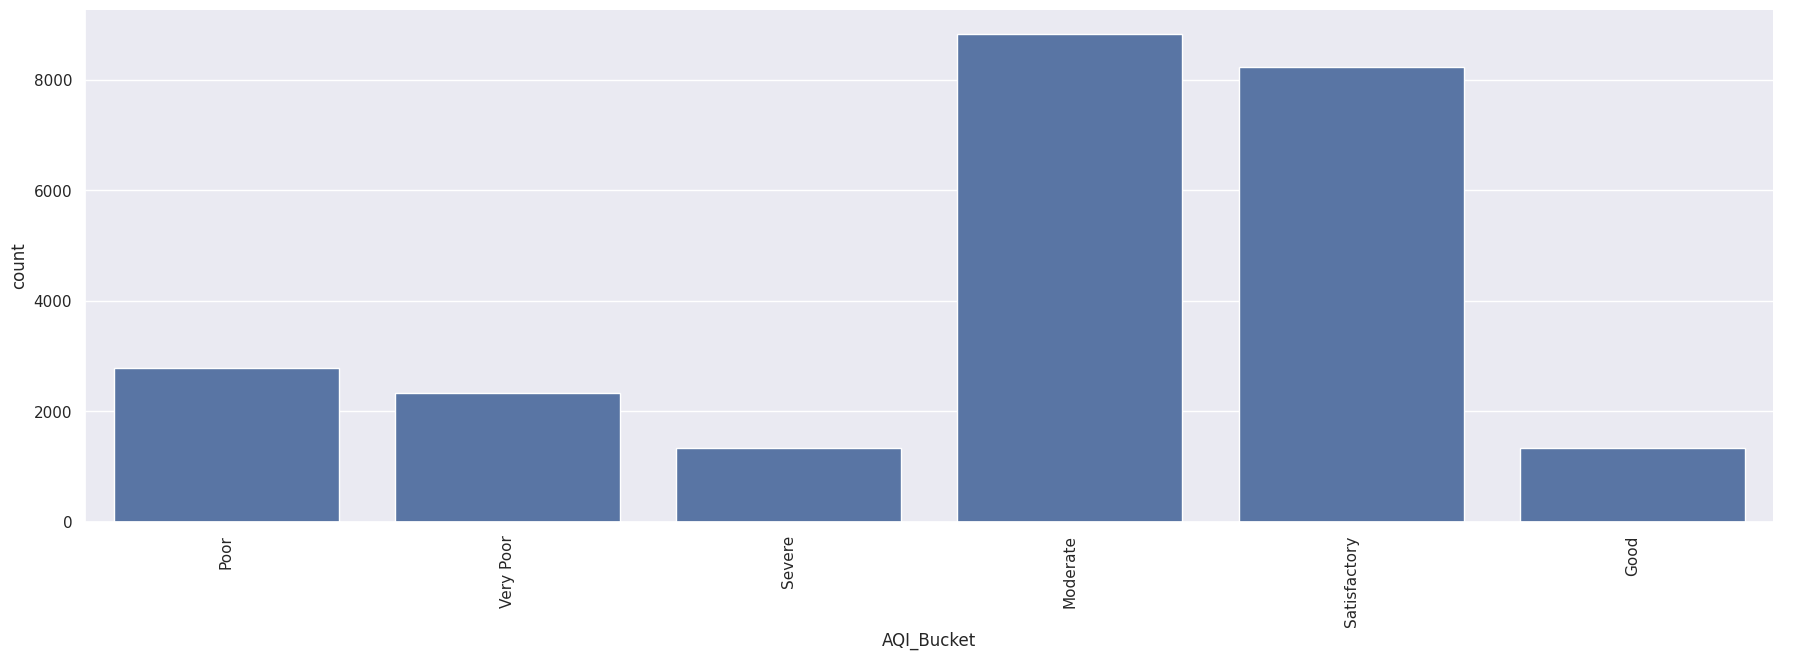

In [ ]:
import seaborn as sns

# Create a count plot with correct function name and parameters
graph = sns.catplot(x='AQI_Bucket', kind="count", data=df, height=6, aspect=3)

# Rotate the x-axis labels for better readability
graph.set_xticklabels(rotation=90)


In [ ]:
df=df.drop(['AQI_Bucket'],axis=1)

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

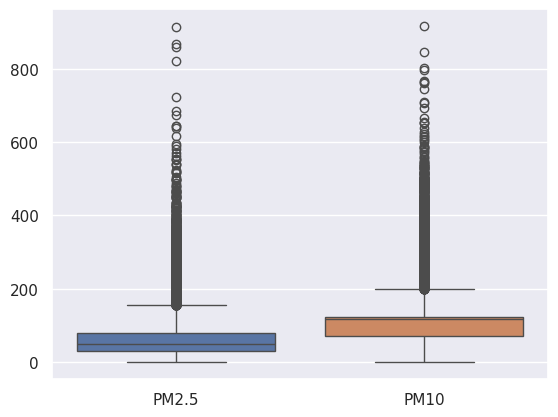

In [ ]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

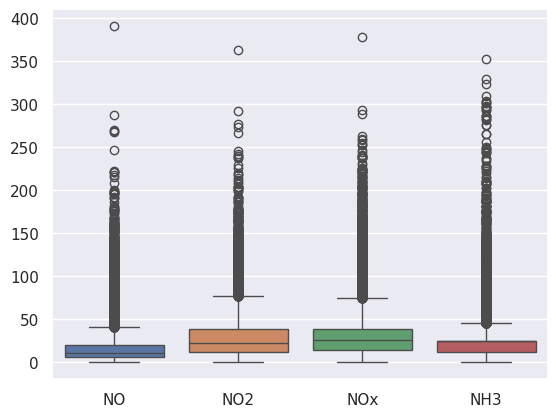

In [ ]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

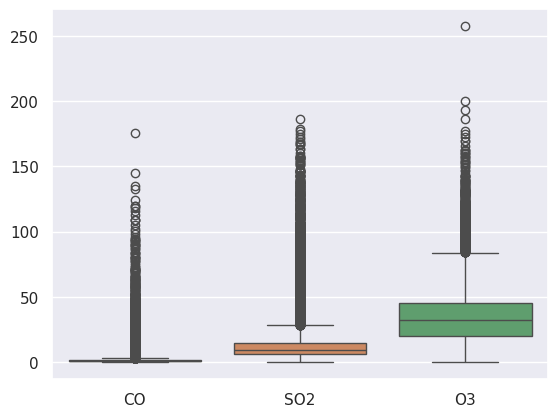

In [ ]:
sns.boxplot(data=df[['CO','SO2','O3']])

<Axes: >

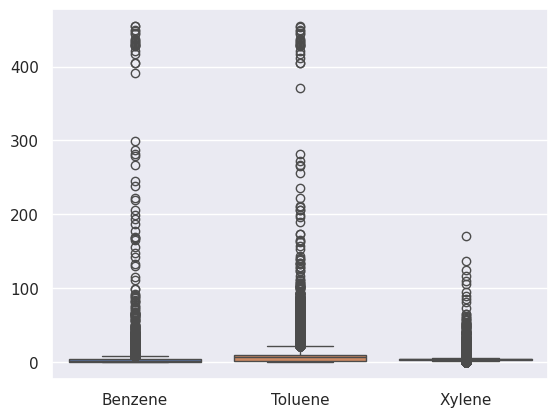

In [ ]:
sns.boxplot(data=df[['Benzene','Toluene','Xylene']])

In [ ]:
def replace_outliers_with_quantiles(df):
  for column in df.select_dtypes(include=['number']).columns:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: Q1 if x<lower_bound else (Q3 if x>upper_bound else x))
  return df

df=replace_outliers_with_quantiles(df)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.334743,5.680901,0.01,5.79,9.430000,14.890000,28.52
O3,24850.0,33.177781,17.487724,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

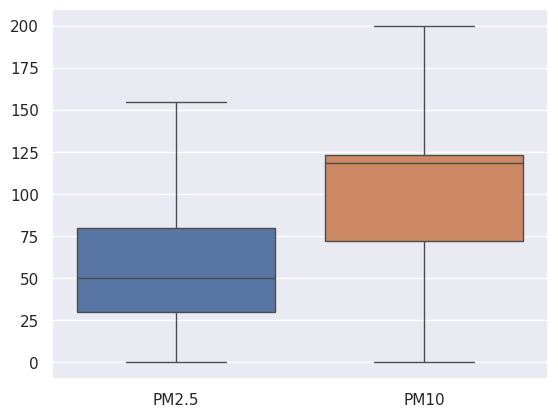

In [ ]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

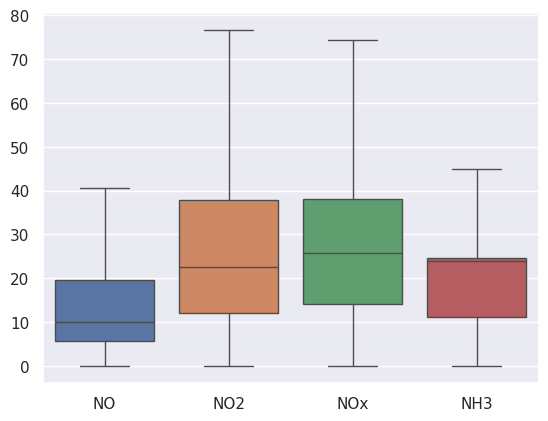

In [ ]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

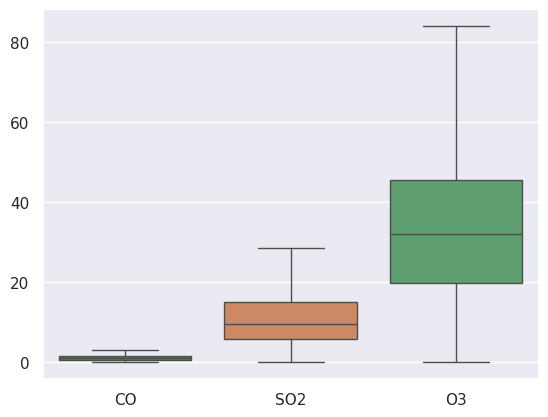

In [ ]:
sns.boxplot(data=df[['CO','SO2','O3']])

<Axes: >

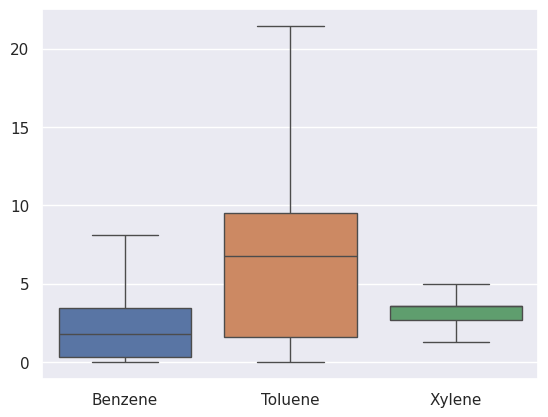

In [ ]:
sns.boxplot(data=df[['Benzene','Toluene','Xylene']])

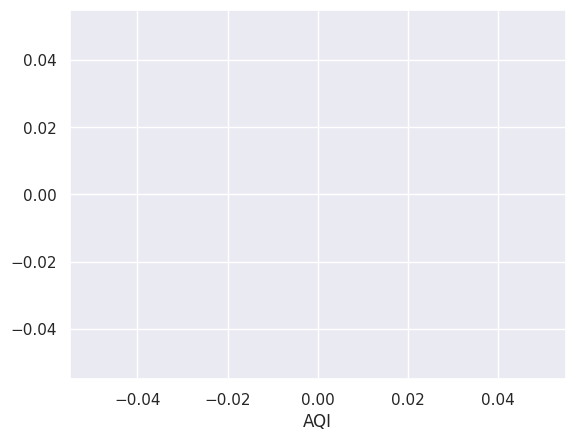

In [ ]:

sns.scatterplot(x='AQI', data=df, color="pink")

plt.show()


In [ ]:
df1 = df.drop(columns=['City'])


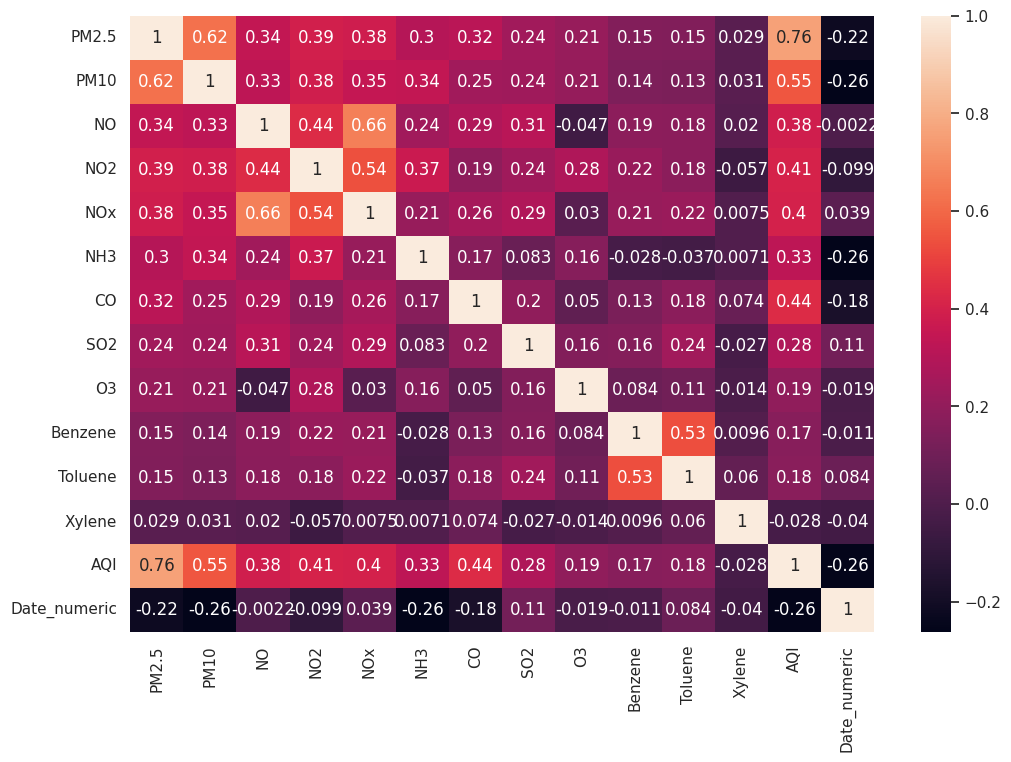

In [ ]:
# Assuming you have a 'Date' column
df1['Date'] = pd.to_datetime(df1['Date'])  # Convert to datetime format
df1['Date_numeric'] = df1['Date'].apply(lambda x: x.timestamp())  # Convert to numeric (timestamp)

# Now select numeric columns
df_numeric = df1.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap with annotations
sns.heatmap(df_numeric.corr(), annot=True)

# Show the plot
plt.show()


In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.020000,0.000000,3.140000,209.0
29,Ahmedabad,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.040000,0.000000,4.810000,328.0
30,Ahmedabad,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.240000,0.010000,3.588683,208.0
31,Ahmedabad,2015-02-01,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.400000,0.040000,3.588683,208.0
32,Ahmedabad,2015-02-02,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,Visakhapatnam,2020-06-28,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,Visakhapatnam,2020-06-29,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,Visakhapatnam,2020-06-30,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [ ]:
df.drop(['Date'],axis=1,inplace=True)
df.drop(['City'],axis=1,inplace=True)

In [ ]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.020000,0.000000,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.040000,0.000000,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.240000,0.010000,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.400000,0.040000,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [ ]:
from sklearn.preprocessing import StandardScaler
df1= StandardScaler().fit_transform(df)

In [ ]:
df1

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -1.32511601,
        -0.29450027,  0.70999757],
       [ 0.77494642,  0.43765334,  0.15319907, ..., -1.32511601,
         2.69513707,  2.07124258],
       [ 1.23616198,  0.43765334,  1.35614288, ..., -1.32298652,
         0.50873294,  0.69855854],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.32298652,
        -1.17169925, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.32511601,
        -1.17169925, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.70336955,
         0.50873294, -1.10880878]])

In [ ]:
df=pd.DataFrame(df1,columns=df.columns)

In [ ]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733,0.698559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,-1.261565,-1.289981,-0.550991,-0.050459,-0.435888,-0.728604,-0.927014,-0.314172,-0.564852,0.077392,1.245171,-1.171699,-1.211760
24846,-0.967493,-0.697593,-1.037190,0.009532,-0.622400,-0.778447,-0.845770,0.419882,-0.173713,-0.743133,-0.854500,-1.171699,-0.880028
24847,-1.013678,-0.911518,-1.033766,0.217701,-0.510864,-0.911363,-0.910766,-0.337056,-0.126822,-1.142455,-1.322987,-1.171699,-0.902906
24848,-1.210668,-1.314802,-0.965288,0.201503,-0.481741,-0.981974,-0.845770,-0.087091,-0.278932,-1.147926,-1.325116,-1.171699,-1.063053


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
x=df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']]
y=df['AQI']

In [ ]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733


In [ ]:
y.head()

,AQI
0,0.709998
1,2.071243
2,0.698559
3,0.698559
4,0.698559


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19880, 12)
(4970, 12)
(19880,)
(4970,)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [ ]:

# Calculate RMSE for training and testing data
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

# Print RMSE values
print("RMSE TRAINING DATA: ", RMSE_train)
print("RMSE TESTING DATA: ", RMSE_test)
print('-' * 50)

# Print R-squared values for training and testing
print("R-squared value on training data: ", model.score(x_train, y_train))
print("R-squared value on testing data: ", model.score(x_test, y_test))


RMSE TRAINING DATA:  0.5906632319454995
RMSE TESTING DATA:  0.5864427916237933
--------------------------------------------------
R-squared value on training data:  0.6522557656756303
R-squared value on testing data:  0.6514882030871058


In [ ]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
train_pred=KNN.predict(x_train)
test_pred=KNN.predict(x_test)

In [ ]:

# Calculate RMSE for training and testing data
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

# Print RMSE values
print("RMSE TRAINING DATA: ", RMSE_train)
print("RMSE TESTING DATA: ", RMSE_test)
print('-' * 50)

# Print R-squared values for training and testing
print("R-squared value on training data: ", model.score(x_train, y_train))
print("R-squared value on testing data: ", model.score(x_test, y_test))


RMSE TRAINING DATA:  0.39075256466050245
RMSE TESTING DATA:  0.4821402873697164
--------------------------------------------------
R-squared value on training data:  0.6522557656756303
R-squared value on testing data:  0.6514882030871058


In [ ]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)

In [ ]:

# Calculate RMSE for training and testing data
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

# Print RMSE values
print("RMSE TRAINING DATA: ", RMSE_train)
print("RMSE TESTING DATA: ", RMSE_test)
print('-' * 50)

# Print R-squared values for training and testing
print("R-squared value on training data: ", model.score(x_train, y_train))
print("R-squared value on testing data: ", model.score(x_test, y_test))

RMSE TRAINING DATA:  0.026217748284546396
RMSE TESTING DATA:  0.5427029167992699
--------------------------------------------------
R-squared value on training data:  0.6522557656756303
R-squared value on testing data:  0.6514882030871058


In [ ]:
dt=RandomForestRegressor()
dt.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)

In [ ]:

# Calculate RMSE for training and testing data
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))

# Print RMSE values
print("RMSE TRAINING DATA: ", RMSE_train)
print("RMSE TESTING DATA: ", RMSE_test)
print('-' * 50)

# Print R-squared values for training and testing
print("R-squared value on training data: ", model.score(x_train, y_train))
print("R-squared value on testing data: ", model.score(x_test, y_test))

RMSE TRAINING DATA:  0.1481177260587315
RMSE TESTING DATA:  0.38625485833214185
--------------------------------------------------
R-squared value on training data:  0.6522557656756303
R-squared value on testing data:  0.6514882030871058
